In [1]:
!pip install fasttext
!pip install konlpy
!pip install soynlp

# 1. EDA(포괄적인 데이터 탐색)

In [2]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/kaggle/emotion_data.xlsx')

In [4]:
data

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0
...,...,...,...,...,...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오,NaN,NaN,NaN,NaN,NaN
38590,재미가 없으니 망하지,혐오,NaN,NaN,NaN,NaN,NaN
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오,NaN,NaN,NaN,NaN,NaN
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    38594 non-null  object 
 1   Emotion     38594 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   공포          7 non-null      object 
 6   5468        7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 2.1+ MB


In [6]:
data.loc[:,:'Emotion']

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38590,재미가 없으니 망하지,혐오
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [7]:
data = data.loc[:,:'Emotion']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38594 non-null  object
 1   Emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB


In [9]:
data.describe()

,Sentence,Emotion
count,38594,38594
unique,38509,7
top,감사합니다.,행복
freq,4,6037


# train, test 데이터 분리


In [10]:
from sklearn.model_selection import train_test_split
                                                         
data_train, data_test = train_test_split(data, test_size=0.25, random_state=0)

print(data_train.shape)
print(data_test.shape)

(28945, 2)
(9649, 2)


In [11]:
print(data_train.head())
print(data_test.head())

                                                Sentence Emotion
29186        그냥 멋져유 ~요리할땐 더 멋져유~기부했다고 들었을땐 더더더 멋져부러유~~^^      행복
17237             오아시스노래를 하루중 12시간을 듣고있어서귀가너무아퍼요 ㅠㅠㅠㅠㅠㅠ0      슬픔
22295                                        다시만나면 안됬던거야      슬픔
8161                      근데 단종 시킨다니깐 갑자기 폭발사고가 안일어날까요??      놀람
11873  김상수 니는 야구그만둬라 자식아!!그따위 실력으로 프로야구한다고OOO이가!!내가 해...      분노
                           Sentence Emotion
954     '어이없는 실책' 이라고 아나운서가 예기하더군요.      공포
387              대체왜 거기서 그러고 가는거에요?      공포
6711            음??? 생각보다 벌금이 약허네??      놀람
12505              돈에 양심판 사람들 혐오스럽다      분노
5599                우와..있는줄 몰랐다. ㅋㅋ      놀람


In [12]:
X_train = data_train.loc[:]['Sentence']
y_train = data_train.loc[:]['Emotion']
X_test = data_test.loc[:]['Sentence']
y_test = data_test.loc[:]['Emotion']

In [13]:
print("훈련용 데이터 문장 예시:",X_train[0])
print("훈련용 label 예시:",y_train[0])

print("테스트 데이터 문장 갯수:",len(X_test))
print("테스트 label 갯수:",len(y_test))

훈련용 데이터 문장 예시: 언니 동생으로 부르는게 맞는 일인가요..??
훈련용 label 예시: 공포
테스트 데이터 문장 갯수: 9649
테스트 label 갯수: 9649


문장의 최대 길이 : 299
문장의 평균 길이 : 23.71597858006564


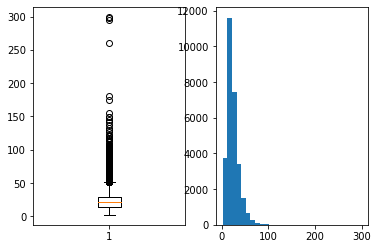

문장의 최대 길이 : 164
문장의 평균 길이 : 23.73416934397347


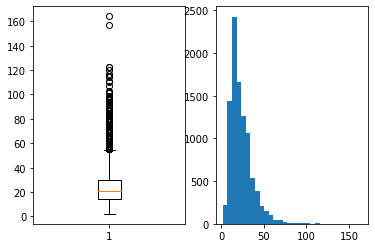

In [14]:
len_result = [len(s) for s in X_train]
print('문장의 최대 길이 : {}'.format(np.max(len_result)))
print('문장의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result,bins=30)
plt.show()

len_result2 = [len(s) for s in X_test]
print('문장의 최대 길이 : {}'.format(np.max(len_result2)))
print('문장의 평균 길이 : {}'.format(np.mean(len_result2)))

plt.subplot(1,2,1)
plt.boxplot(len_result2)
plt.subplot(1,2,2)
plt.hist(len_result2,bins=30)
plt.show()

In [15]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("훈련용데이터의 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

훈련용데이터의 레이블에 대한 빈도수:
[['공포' '놀람' '분노' '슬픔' '중립' '행복' '혐오']
 [4097 4423 4280 3938 3624 4509 4074]]


## Pre-trained Fasttext 한국어 모델

In [ ]:
import fasttext
pretrained_model=fasttext.FastText.load_model('/content/drive/MyDrive/Colab Notebooks/kaggle/cc.ko.300.bin')
# ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')
pretrained_model.get_dimension()

In [ ]:
pretrained_model.get_nearest_neighbors('파이썬')

In [ ]:
len(pretrained_model['한국인'])

In [ ]:
import fasttext.util

In [ ]:
fasttext.util.reduce_model(pretrained_model, 100)

## okt사용하여 토큰화 & soynlp사용하여 반복되는 문자 정제

In [16]:
from konlpy.tag import Okt
from soynlp.normalizer import *
okt = Okt()

In [17]:
#test shell
print(okt.morphs(data.loc[1,'Sentence'])) #okt 테스트


print(emoticon_normalize('ㅈ망겜 핵관리도 못하더니 서버관리도 못하냐? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', num_repeats=3)) #soynlp 테스트
print(okt.pos(emoticon_normalize('ㅈ망겜 핵관리도 못하더니 서버관리도 못하냐? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', num_repeats=3))) #soynlp 테스트

['그냥', '내', '느낌', '일', '뿐', '겠지', '?']
ㅈ겜 핵관리도 못하더니 서버관리도 못하냐? ㅋㅋㅋ
[('ㅈ', 'KoreanParticle'), ('겜', 'Noun'), ('핵', 'Noun'), ('관리', 'Noun'), ('도', 'Josa'), ('못', 'VerbPrefix'), ('하더니', 'Verb'), ('서버', 'Noun'), ('관리', 'Noun'), ('도', 'Josa'), ('못', 'VerbPrefix'), ('하냐', 'Verb'), ('?', 'Punctuation'), ('ㅋㅋㅋ', 'KoreanParticle')]


In [18]:
X_train_tokenize = []
for i in X_train:
  X_train_tokenize.append(okt.morphs(emoticon_normalize(i, num_repeats=3), stem=True)) #norm옵션 : 그래욬ㅋㅋ -> 그래요 처럼 변환해주는 옵션 / stem옵션 : 원형을 찾아주는 옵션 (그래요 -> 그렇다)

In [19]:
for i in X_train_tokenize[:2]:
  print(i)

['그냥', '멋지다', '유', '~', '요리', '하다', '땐', '더', '멋지다', '유', '~', '기부', '하다', '들다', '땐', '더더', '더', '멋지다', '부러', '유', '~~^^']
['오아시스', '노래', '를', '하루', '중', '12시간', '을', '듣다', '귀가', '너무', '아프다', 'ㅠㅠㅠ', '0']


In [20]:
train_len = [len(s) for s in X_train_tokenize]
for i in range(3):
  print(X_train_tokenize[i] ,":" ,train_len[i])

for i in X_train[:3]:
  print(okt.pos(emoticon_normalize(i, num_repeats=3), stem=True))

['그냥', '멋지다', '유', '~', '요리', '하다', '땐', '더', '멋지다', '유', '~', '기부', '하다', '들다', '땐', '더더', '더', '멋지다', '부러', '유', '~~^^'] : 21
['오아시스', '노래', '를', '하루', '중', '12시간', '을', '듣다', '귀가', '너무', '아프다', 'ㅠㅠㅠ', '0'] : 13
['다시', '만나다', '안되다'] : 3
[('그냥', 'Noun'), ('멋지다', 'Adjective'), ('유', 'Noun'), ('~', 'Punctuation'), ('요리', 'Noun'), ('하다', 'Verb'), ('땐', 'Noun'), ('더', 'Noun'), ('멋지다', 'Adjective'), ('유', 'Noun'), ('~', 'Punctuation'), ('기부', 'Noun'), ('하다', 'Verb'), ('들다', 'Verb'), ('땐', 'Noun'), ('더더', 'Noun'), ('더', 'Noun'), ('멋지다', 'Adjective'), ('부러', 'Noun'), ('유', 'Noun'), ('~~^^', 'Punctuation')]
[('오아시스', 'Noun'), ('노래', 'Noun'), ('를', 'Josa'), ('하루', 'Noun'), ('중', 'Suffix'), ('12시간', 'Number'), ('을', 'Foreign'), ('듣다', 'Verb'), ('귀가', 'Noun'), ('너무', 'Adverb'), ('아프다', 'Adjective'), ('ㅠㅠㅠ', 'KoreanParticle'), ('0', 'Number')]
[('다시', 'Noun'), ('만나다', 'Verb'), ('안되다', 'Adjective')]


토큰화된 문장의 최대 토큰의 갯수 : 113
토큰화된 문장의 평균 토큰의 갯수 : 9.5648643979962


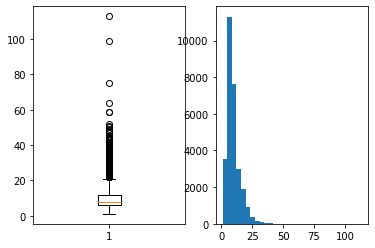

In [21]:
print('토큰화된 문장의 최대 토큰의 갯수 : {}'.format(np.max(train_len)))
print('토큰화된 문장의 평균 토큰의 갯수 : {}'.format(np.mean(train_len)))
plt.subplot(1,2,1)
plt.boxplot(train_len)
plt.subplot(1,2,2)
plt.hist(train_len,bins=30)
plt.show()

## LSTM 적용

In [22]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential


In [ ]:
model = keras.Sequential()
model.add(layers.LSTM)